### ECE 572 Course Project - Cool Fancy-Dancy Name Here

Project Description:
Python-based program designed to extract and visualize network traffic information from a Wireshark generated .csv file. 

Team Members:

Devang Sharma - V00931210 - devsharma@uvic.ca

Alex Spurgeon - V00818626 - aespurge@uvic.ca

Aditya Naren Yerramilli - V00938179 - naren1@uvic.ca


#### Useful Resources for this project:

General References:

Pandas: https://nbviewer.jupyter.org/gist/manujeevanprakash/996d18985be612072ee0
https://pandas.pydata.org/pandas-docs/stable/getting_started/dsintro.html

Mix of everything: https://www.analyticsvidhya.com/blog/2016/01/complete-tutorial-learn-data-science-python-scratch-2/

Examples of analysis:
https://null-byte.wonderhowto.com/how-to/analyze-wi-fi-data-captures-with-jupyter-notebook-0201490/

https://github.com/skickar/Research/blob/master/RedLineResearch.ipynb

https://medium.com/hackervalleystudio/learning-packet-analysis-with-data-science-5356a3340d4e

https://github.com/secdevopsai/Packet-Analytics/blob/master/Packet-Analytics.ipynb

(Some minor examples here) https://www.python4networkengineers.com/posts/wireshark/analyzing_wireshark_data_with_pandas/

In [1]:
# Imports and essentials
import numpy as np
import pandas as pd
from pandas import plotting
import matplotlib.pyplot as plt
import datetime
import re
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline

# 1) ECE572Dos

In [2]:
# Import data from csv files - ECE572Dos.csv, ECE572Test.csv, & ECE572DoS.csv
dos_df = pd.read_csv('ECE572DoS_n.csv', 
                 delimiter = ',', encoding='latin-1', header=0) # Header labels all in row = 0 

## Cleanup

In [3]:
dos_df = dos_df.fillna(0)

dos_df = dos_df.drop(columns="No.")

#print(dos_df.head())

print(dos_df[["Source", "Source Port", 
               "Destination", "Dest Port", "Protocol"]].head(10)) #print only required data

print("\nDataset dimensions", dos_df.shape)

              Source  Source Port        Destination  Dest Port Protocol
0     192.168.56.105          0.0     192.168.56.104        0.0     ICMP
1  PcsCompu_6c:9b:66          0.0          Broadcast        0.0      ARP
2  PcsCompu_74:73:8a          0.0  PcsCompu_6c:9b:66        0.0      ARP
3     192.168.56.104          0.0     192.168.56.105        0.0     ICMP
4     192.168.56.105          0.0     192.168.56.104        0.0     ICMP
5     192.168.56.104          0.0     192.168.56.105        0.0     ICMP
6     192.168.56.105          0.0     192.168.56.104        0.0     ICMP
7     192.168.56.104          0.0     192.168.56.105        0.0     ICMP
8     192.168.56.105          0.0     192.168.56.104        0.0     ICMP
9     192.168.56.104          0.0     192.168.56.105        0.0     ICMP

Dataset dimensions (7769, 8)


## Network Graph

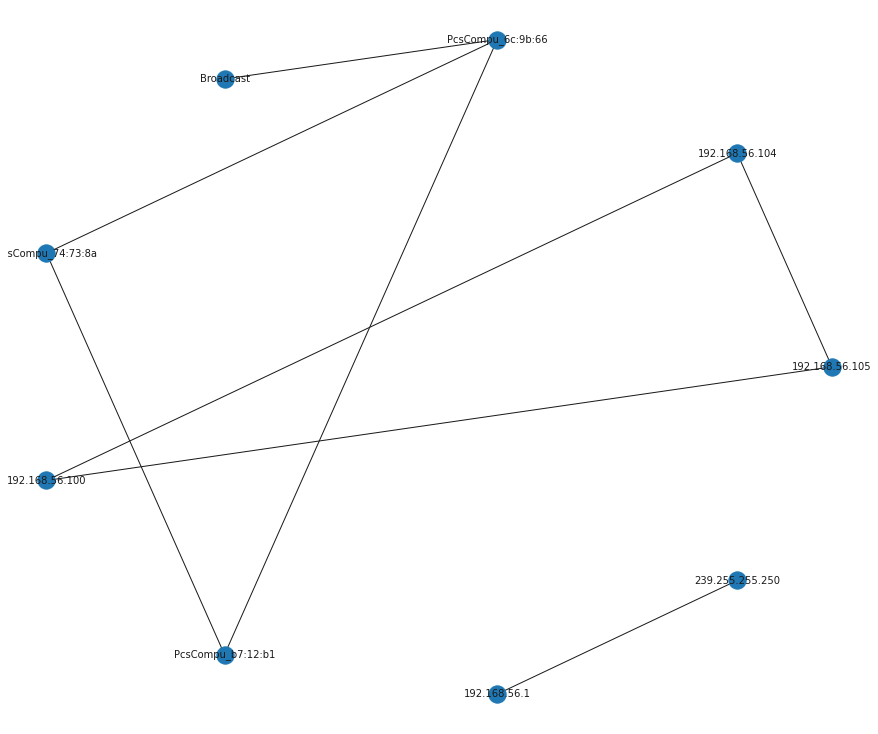

In [4]:
#https://towardsdatascience.com/from-dataframe-to-network-graph-bbb35c8ab675
import networkx as nx
network_graph = nx.from_pandas_edgelist(dos_df, 'Source', 'Destination')
from matplotlib.pyplot import figure
figure(figsize=(12, 10))
nx.draw_shell(network_graph, with_labels=True, font_size=10)

## Statistics

In [5]:
def df_to_num(unique_df=None):
    num_unique_df = pd.Series([])
    i = -1
    for val in unique_df:
        if not (re.search('[a-zA-Z]', val)):
            i+=1
            num_unique_df.loc[i] = val
    return num_unique_df

### Top level view of the Dos PCap

In [6]:
# Source Adddress with the highest amount of data transfer
print("# Source Address with the highest amount of data transfer")
print(dos_df['Source'].describe(),'\n\n')

# Destination Address with the highest amount of data transfer
print("# Destination with the highest amount of data transfer")
print(dos_df['Destination'].describe(),'\n\n')

frequent_address = dos_df['Source'].describe()['top']

# Destination address to which most of the connections/data transfers are made
print("# Destination address receiving most amount of data")
print(dos_df[dos_df['Source'] == frequent_address]['Destination'].unique(),"\n\n")

# Most frequently used destination port by top source address (dst ports)
print("# Most frequently used Destination ports by top source address (Destination Ports)")
print((dos_df[dos_df['Source'] == frequent_address]['Dest Port'].unique()),"\n\n")

# Most frequently used source port by top source address(src ports)
print("# Most frequently used source ports by top source address (Source ports)")
print(dos_df[dos_df['Source'] == frequent_address]['Source Port'].unique(),"\n\n")

# Source Address with the highest amount of data transfer
count               7769
unique                 7
top       192.168.56.105
freq                5144
Name: Source, dtype: object 


# Destination with the highest amount of data transfer
count               7769
unique                 8
top       192.168.56.104
freq                5144
Name: Destination, dtype: object 


# Destination address receiving most amount of data
['192.168.56.104' '192.168.56.100'] 


# Most frequently used Destination ports by top source address (Destination Ports)
[ 0. 80. 67.] 


# Most frequently used source ports by top source address (Source ports)
[    0. 46814. 46816. ...    68. 46830. 46832.] 




### Deep analysis of Source Stats

In [7]:
# Unique Source Addresses
print("Unique Source Addresses")
src_unique_df = dos_df['Source'].unique()
print(src_unique_df)
print('\nUnique IPv4 Source Addresses\n'+str(df_to_num(src_unique_df)))

Unique Source Addresses
['192.168.56.105' 'PcsCompu_6c:9b:66' 'PcsCompu_74:73:8a' '192.168.56.104'
 '192.168.56.100' 'PcsCompu_b7:12:b1' '192.168.56.1']

Unique IPv4 Source Addresses
0    192.168.56.105
1    192.168.56.104
2    192.168.56.100
3      192.168.56.1
dtype: object


/home/devang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


Total data transmitted by Source:
Source
192.168.56.1            860
192.168.56.100         1180
192.168.56.104       191149
192.168.56.105       282577
PcsCompu_6c:9b:66       360
PcsCompu_74:73:8a       252
PcsCompu_b7:12:b1       120
Name: Length, dtype: int64
<class 'pandas.core.series.Series'>


<AxesSubplot:title={'center':'Addresses Sending Payloads'}, ylabel='Source'>

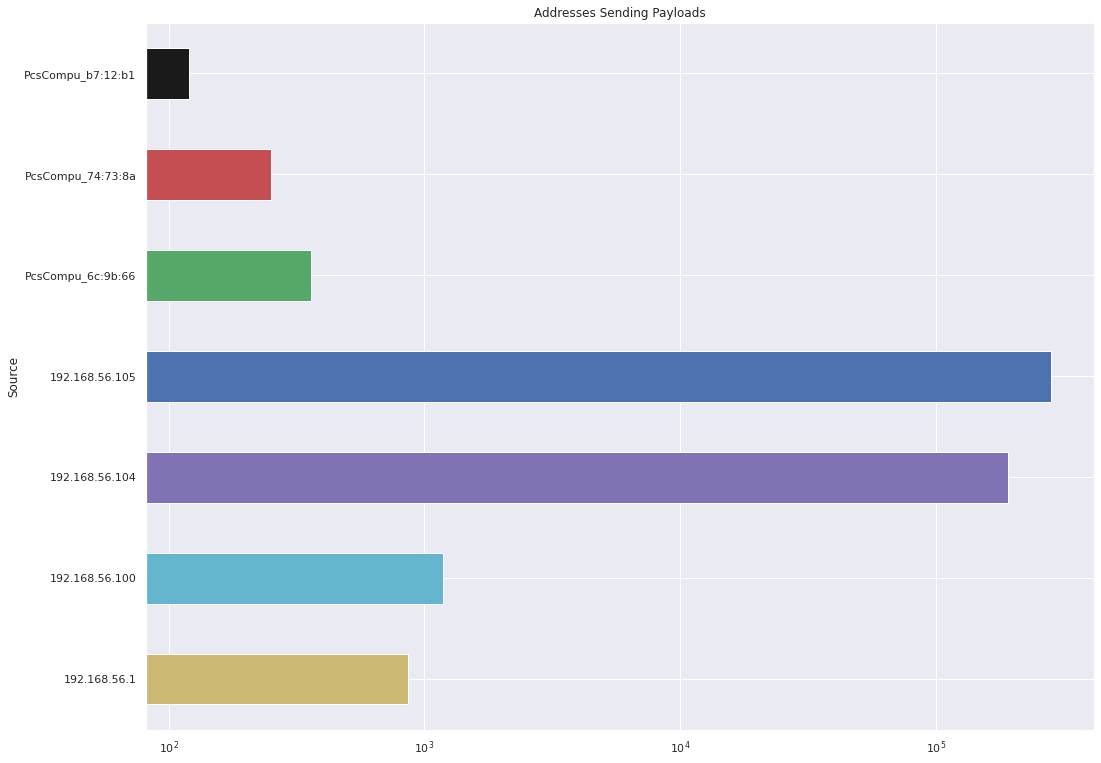

In [8]:
# Group by Source Address and Payload Length Sum
source_addresses = dos_df.groupby('Source')['Length'].sum()
print("Total data transmitted by Source:\n"+str(source_addresses))

print(type(source_addresses))

source_addresses.plot.barh(title="Addresses Sending Payloads",figsize=(17,13), 
                           logx=True, color=["y","c","m", "b", "g", "r", "k"])

### Deep analysis of Destination Stats

In [9]:
# Unique Destination Addresses
print("\nUnique Destination Addresses")
dest_unique_df = dos_df['Destination'].unique()
print(dest_unique_df)
print('\nUnique IPv4 Destination Addresses\n'+str(df_to_num(dest_unique_df)))


Unique Destination Addresses
['192.168.56.104' 'Broadcast' 'PcsCompu_6c:9b:66' '192.168.56.105'
 'PcsCompu_74:73:8a' '192.168.56.100' 'PcsCompu_b7:12:b1'
 '239.255.255.250']

Unique IPv4 Destination Addresses
0     192.168.56.104
1     192.168.56.105
2     192.168.56.100
3    239.255.255.250
dtype: object


/home/devang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


Total data transmitted by Destination:
Destination
192.168.56.100          684
192.168.56.104       282825
192.168.56.105       191397
239.255.255.250         860
Broadcast                60
PcsCompu_6c:9b:66       270
PcsCompu_74:73:8a       300
PcsCompu_b7:12:b1       102
Name: Length, dtype: int64
<class 'pandas.core.series.Series'>


<AxesSubplot:title={'center':'Addresses Receiving Payloads'}, ylabel='Destination'>

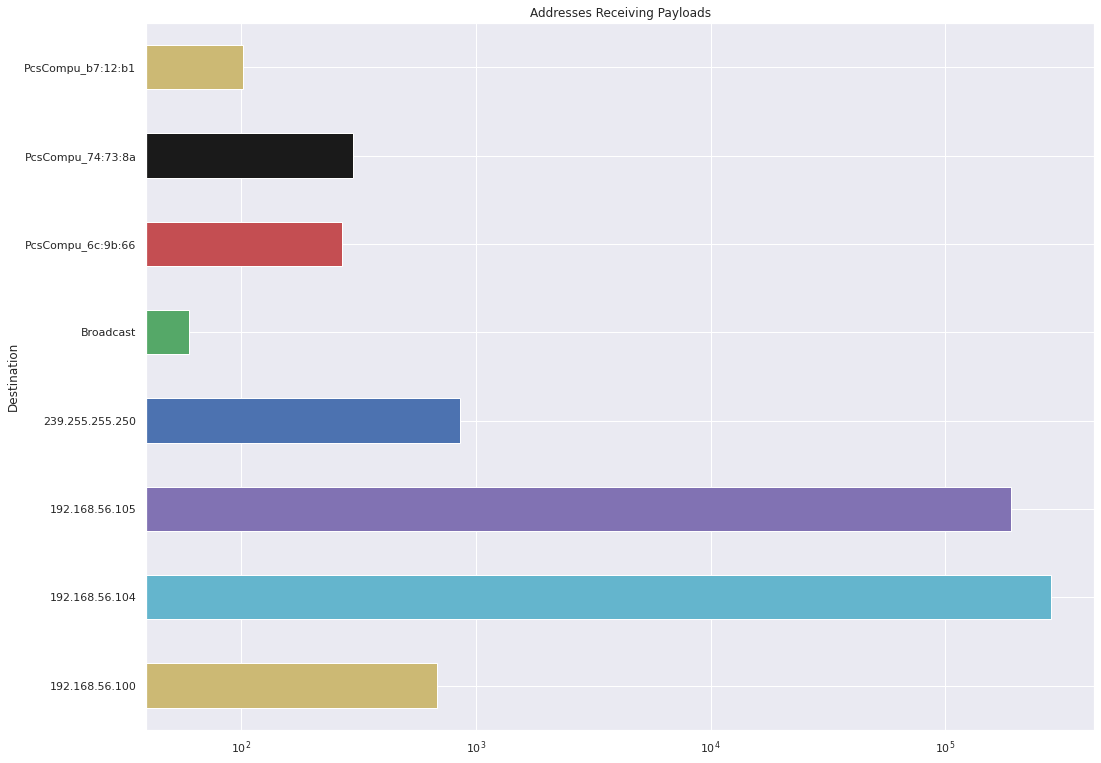

In [10]:
# Group by Source Address and Payload Length Sum
dest_addresses = dos_df.groupby('Destination')['Length'].sum()
print("Total data transmitted by Destination:\n"+str(dest_addresses))

print(type(dest_addresses))

dest_addresses.plot.barh(title="Addresses Receiving Payloads",figsize=(17,13), 
                           logx=True, color=["y","c","m", "b", "g", "r", "k"])

### Deep analysis of Source port

Total data transmitted by Source Port (Top 20):
Source Port
80.0       190415
46826.0      1784
46822.0      1480
46830.0      1294
67.0         1180
46814.0      1067
46824.0      1032
46832.0       911
53300.0       860
68.0          684
46818.0       635
46820.0       272
1470.0        216
1506.0        216
1782.0        216
3394.0        216
2200.0        216
1518.0        216
1516.0        216
3400.0        216
Name: Length, dtype: int64


<AxesSubplot:title={'center':'Source Ports (Bytes Sent)'}, ylabel='Source Port'>

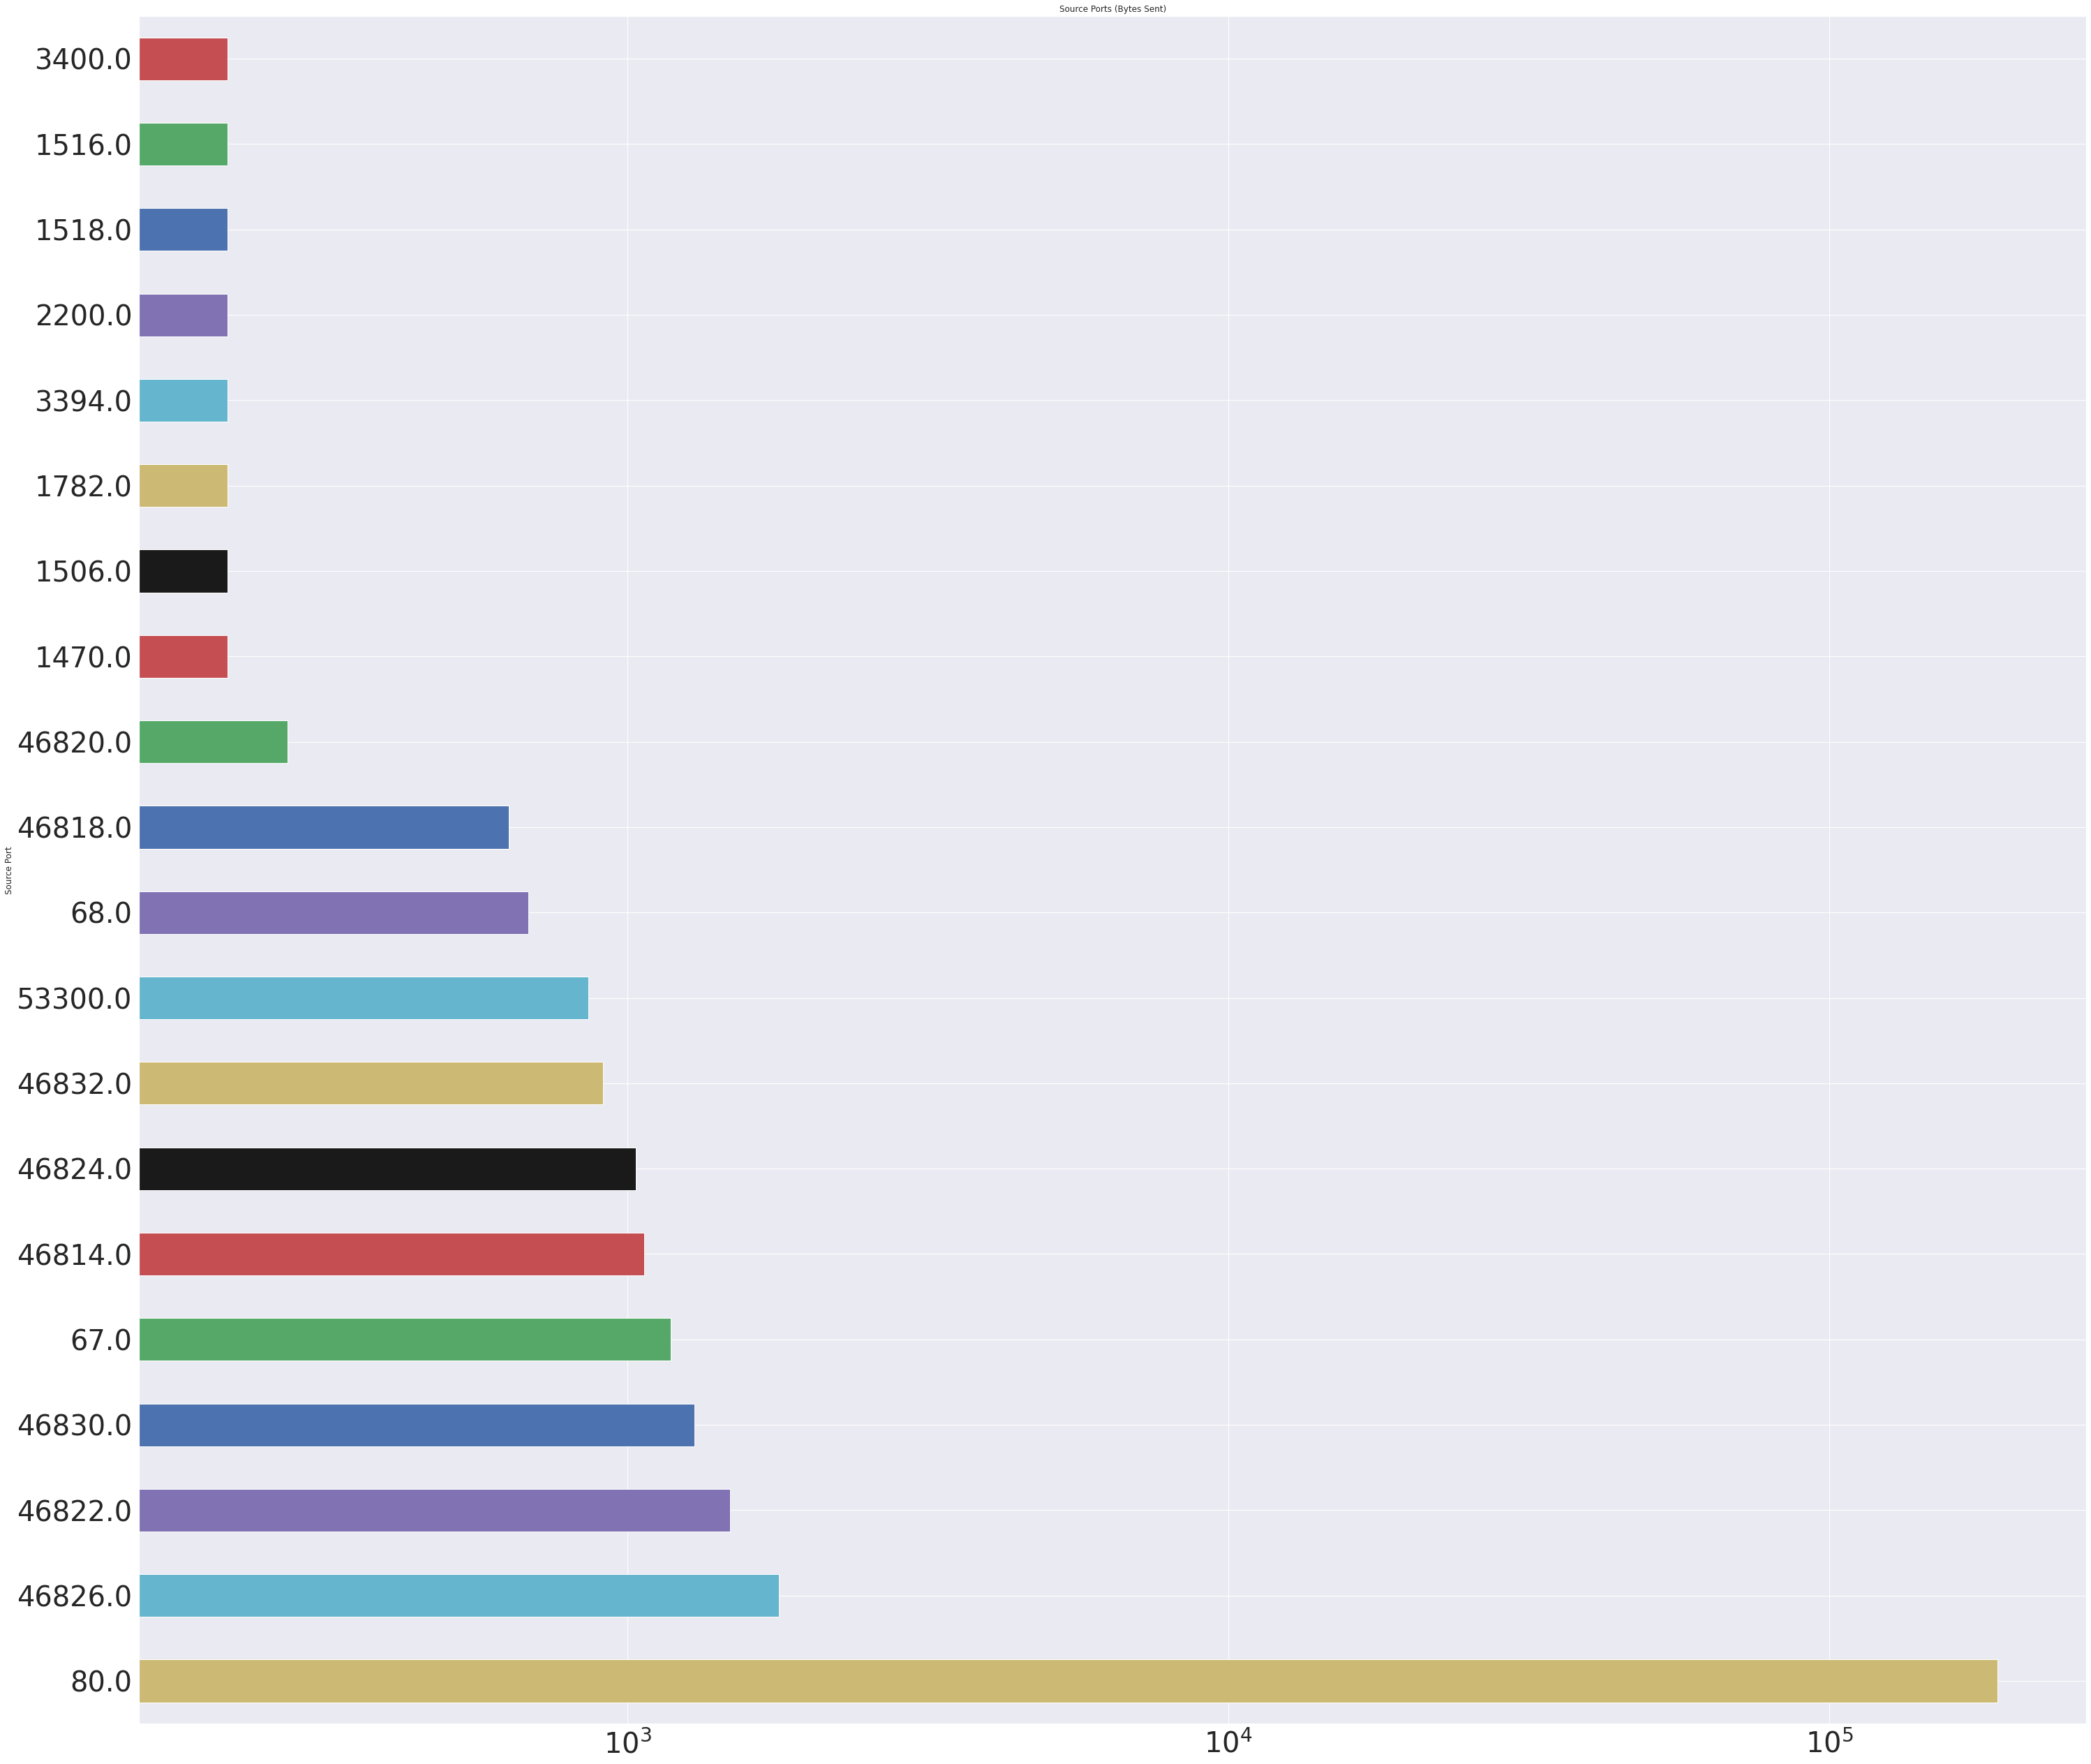

In [11]:
# Group by Source Port and Packet Length Sum
src_pkt_length_df = dos_df[dos_df['Source Port'] != int(0.0)]
src_pkt_length_df = src_pkt_length_df.groupby('Source Port')['Length'].sum().sort_values(ascending=False)
src_pkt_length_df = src_pkt_length_df.head(20)
print("Total data transmitted by Source Port (Top 20):\n"+str(src_pkt_length_df))
src_pkt_length_df.plot.barh(title="Source Ports (Bytes Sent)",figsize=(50,45), 
                           logx=True, color=["y","c","m", "b", "g", "r", "k"], fontsize=40)

Total data transmitted by Destination Port (Top 20):
Dest Port
80.0       281843
46818.0     14752
46826.0      6399
46830.0      4789
46814.0      4557
46822.0      4452
46824.0      1801
46832.0      1585
68.0         1180
1900.0        920
67.0          684
46820.0       206
2378.0        120
3406.0        120
1780.0        120
1782.0        120
2748.0        120
1518.0        120
3394.0        120
1516.0        120
Name: Length, dtype: int64


<AxesSubplot:title={'center':'Destination Ports (Bytes Sent)'}, ylabel='Dest Port'>

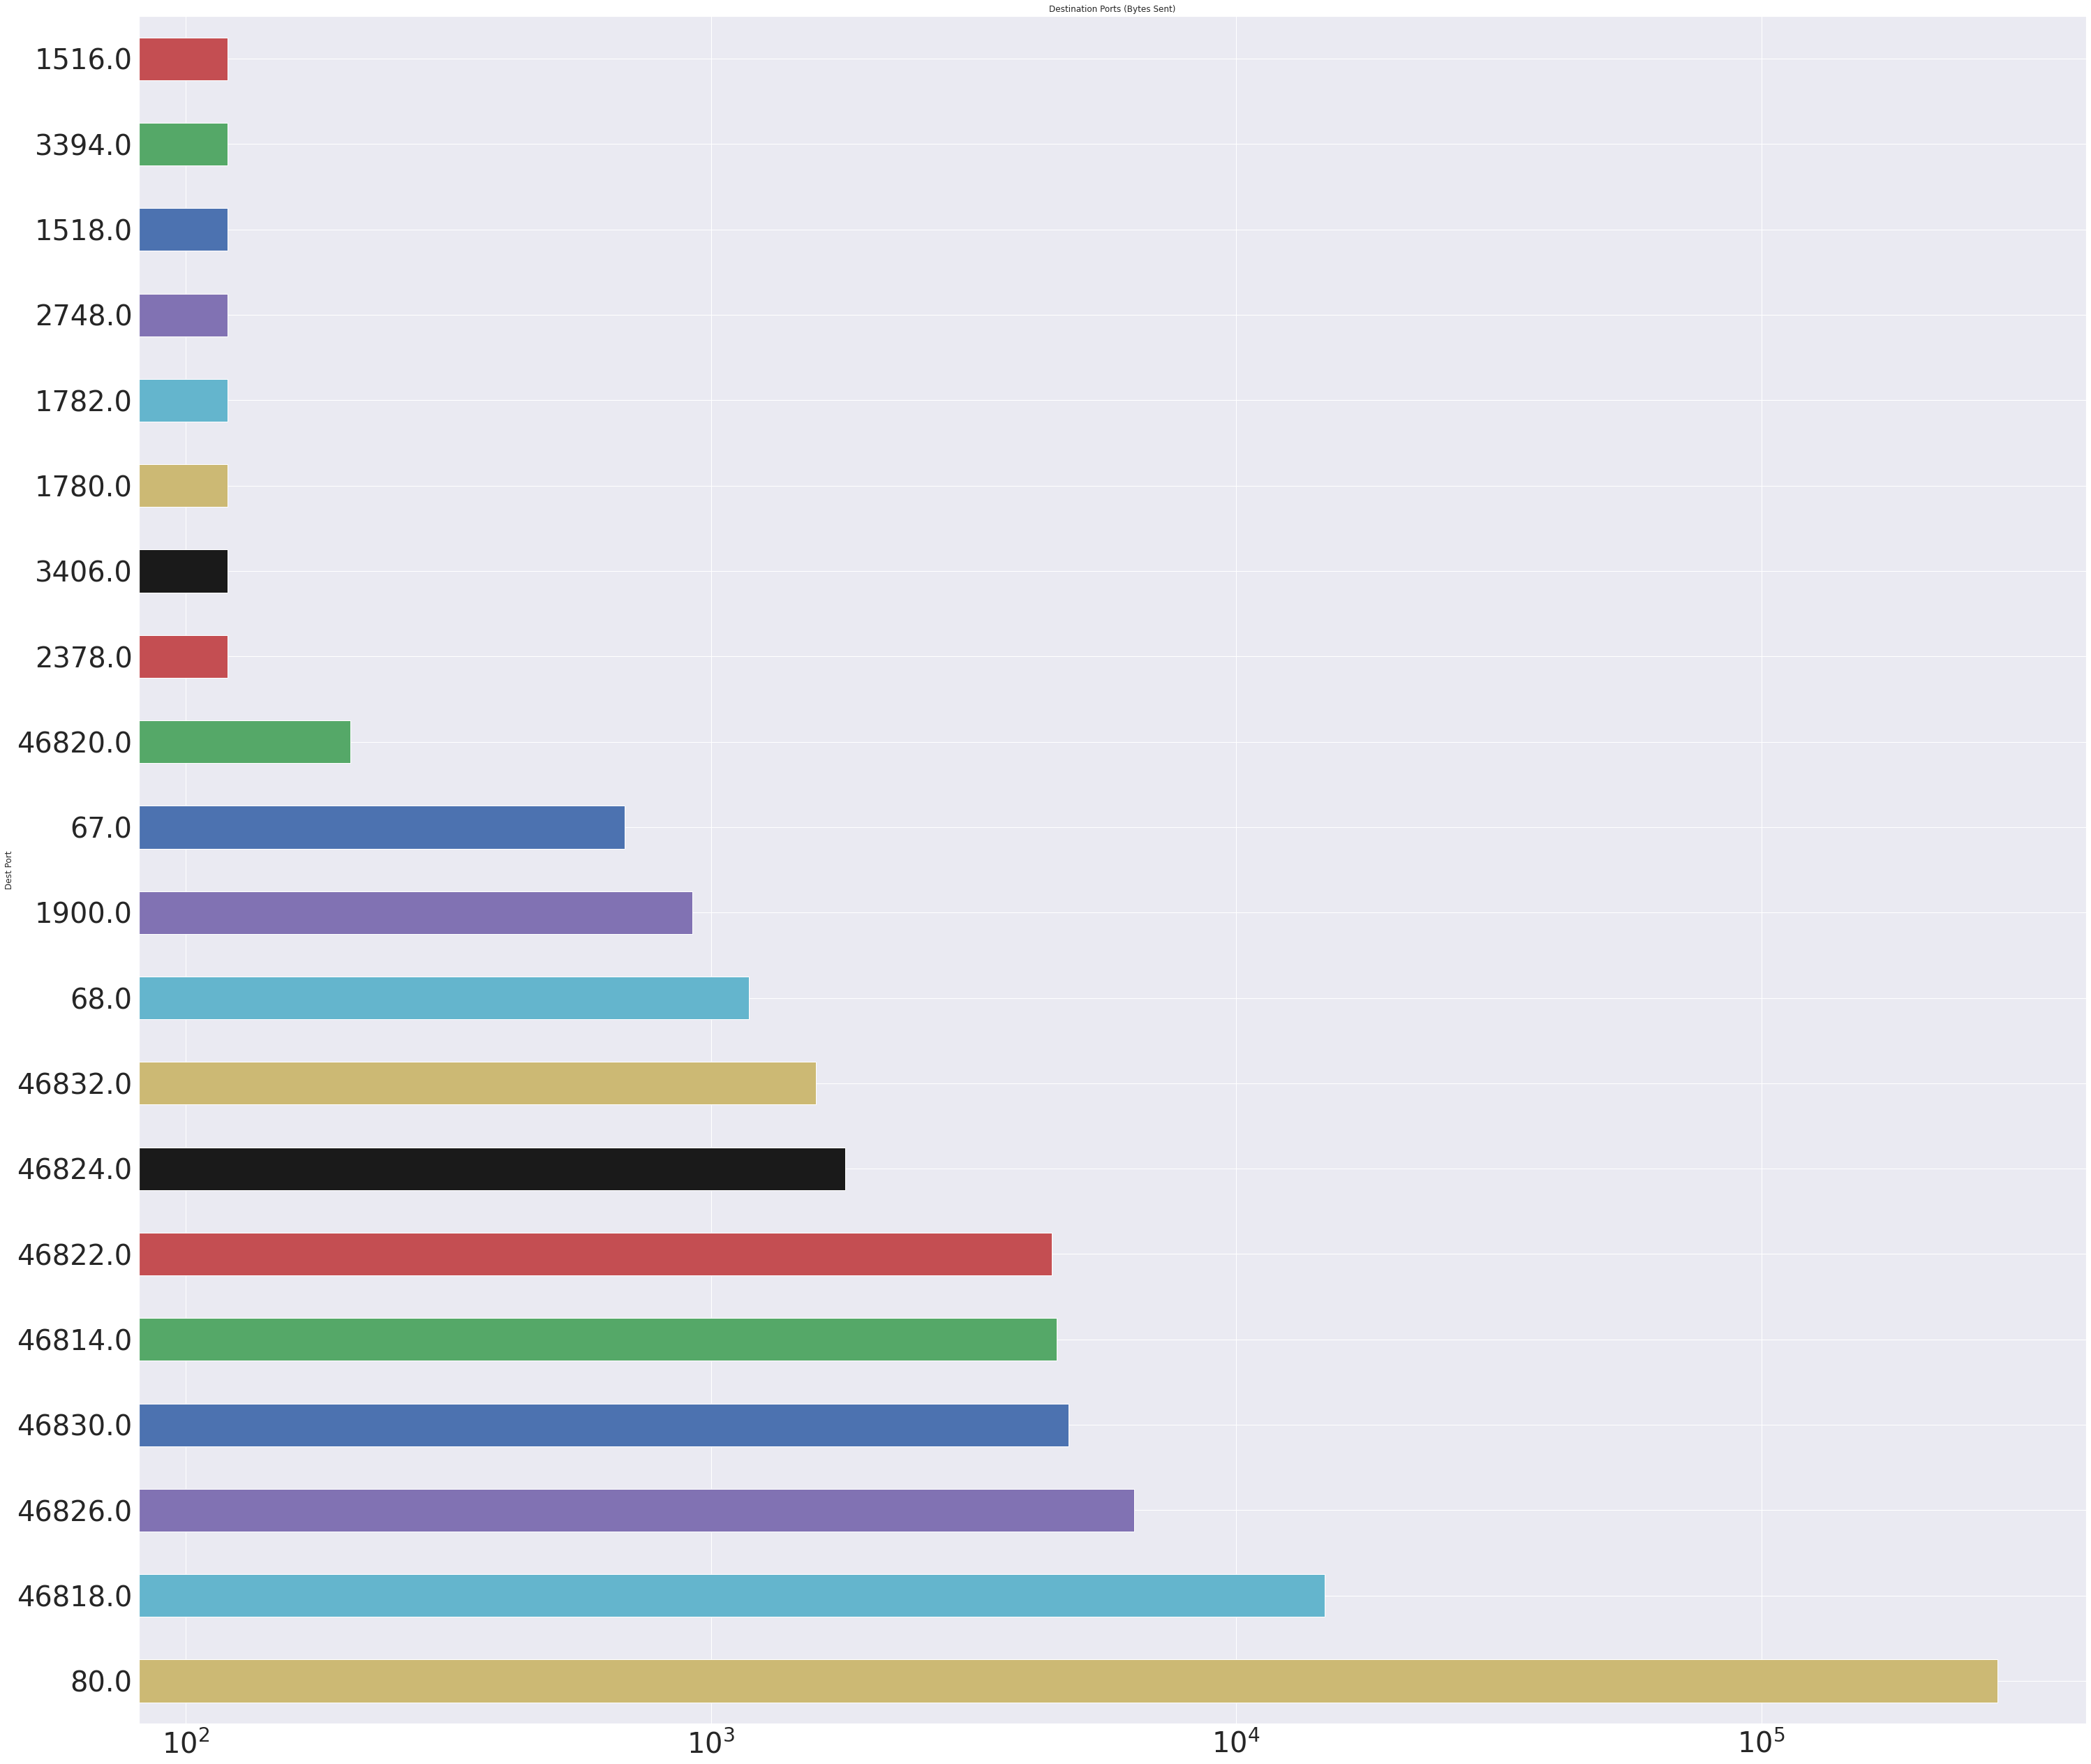

In [12]:
# Group by Destination Port and Packet Length Sum
dest_pkt_length_df = dos_df[dos_df['Dest Port'] != int(0.0)]
dest_pkt_length_df = dest_pkt_length_df.groupby('Dest Port')['Length'].sum().sort_values(ascending=False)
dest_pkt_length_df = dest_pkt_length_df.head(20)
print("Total data transmitted by Destination Port (Top 20):\n"+str(dest_pkt_length_df))
dest_pkt_length_df.plot.barh(title="Destination Ports (Bytes Sent)",figsize=(50,45), 
                           logx=True, color=["y","c","m", "b", "g", "r", "k"], fontsize=40)

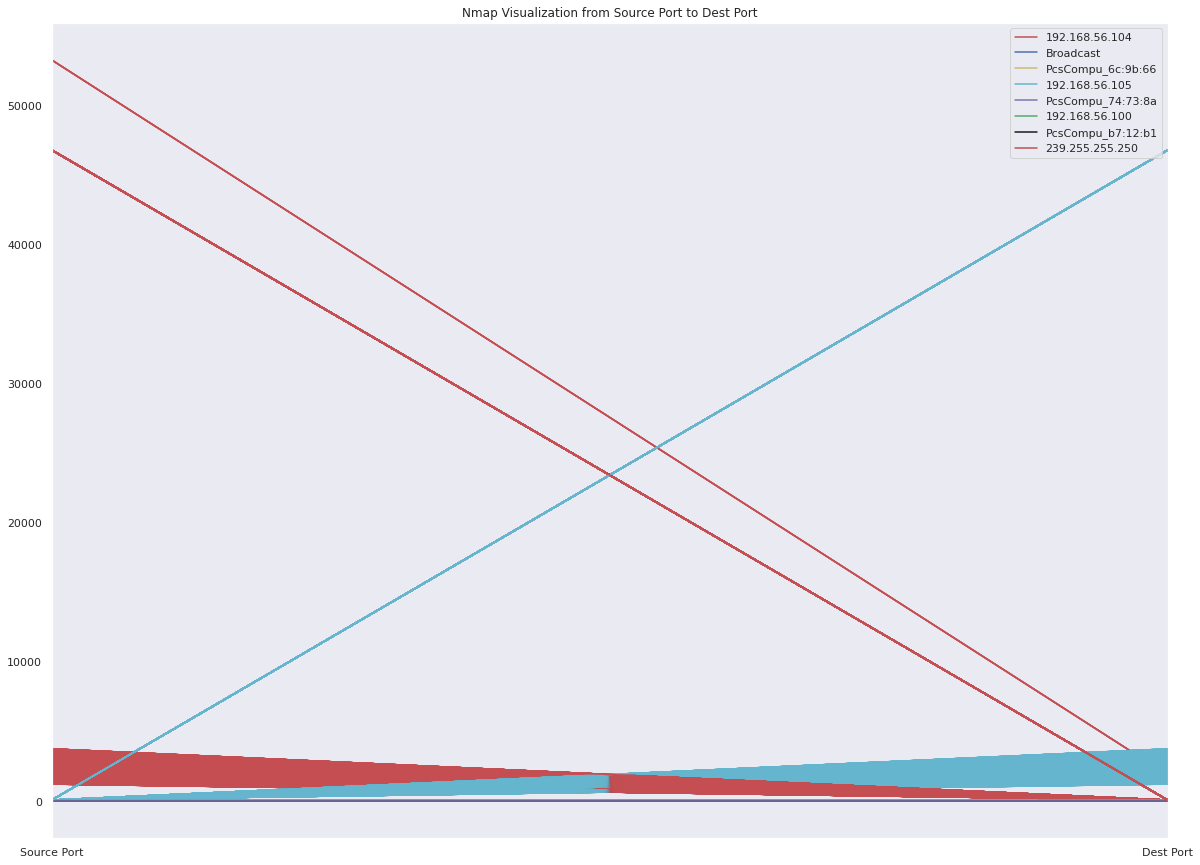

In [16]:
from pandas.plotting import parallel_coordinates
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(20,15))
plotting.parallel_coordinates(dos_df, "Destination", cols=['Source Port', 'Dest Port'], 
                              color=('r', 'b', 'y', 'c', 'm', 'g', 'k'))
plt.title('Nmap Visualization from Source Port to Dest Port')
plt.show()

#### Timeline analysis for 192.168.56.104 -- DOS ATTACK

              Time  Length
0     1.595013e+09      98
4     1.595013e+09      98
6     1.595013e+09      98
8     1.595013e+09      98
12    1.595013e+09      74
...            ...     ...
7761  1.595013e+09      66
7763  1.595013e+09      66
7764  1.595013e+09      66
7766  1.595013e+09      66
7768  1.595013e+09      66

[5143 rows x 2 columns]
Data received by 192.168.56.104 every 10 seconds:
Time
(1595013115.794, 1595013122.794]       294
(1595013122.794, 1595013129.794]      3962
(1595013129.794, 1595013136.794]        66
(1595013136.794, 1595013143.794]      1248
(1595013143.794, 1595013150.794]        66
(1595013150.794, 1595013157.794]       198
(1595013157.794, 1595013164.794]       132
(1595013164.794, 1595013171.794]       132
(1595013171.794, 1595013178.794]       132
(1595013178.794, 1595013185.794]       132
(1595013185.794, 1595013192.794]       198
(1595013192.794, 1595013199.794]         0
(1595013199.794, 1595013206.794]       132
(1595013206.794, 1595013213.794]     

<AxesSubplot:title={'center':'Data received by 192.168.56.104 every 10 seconds'}, ylabel='Time'>

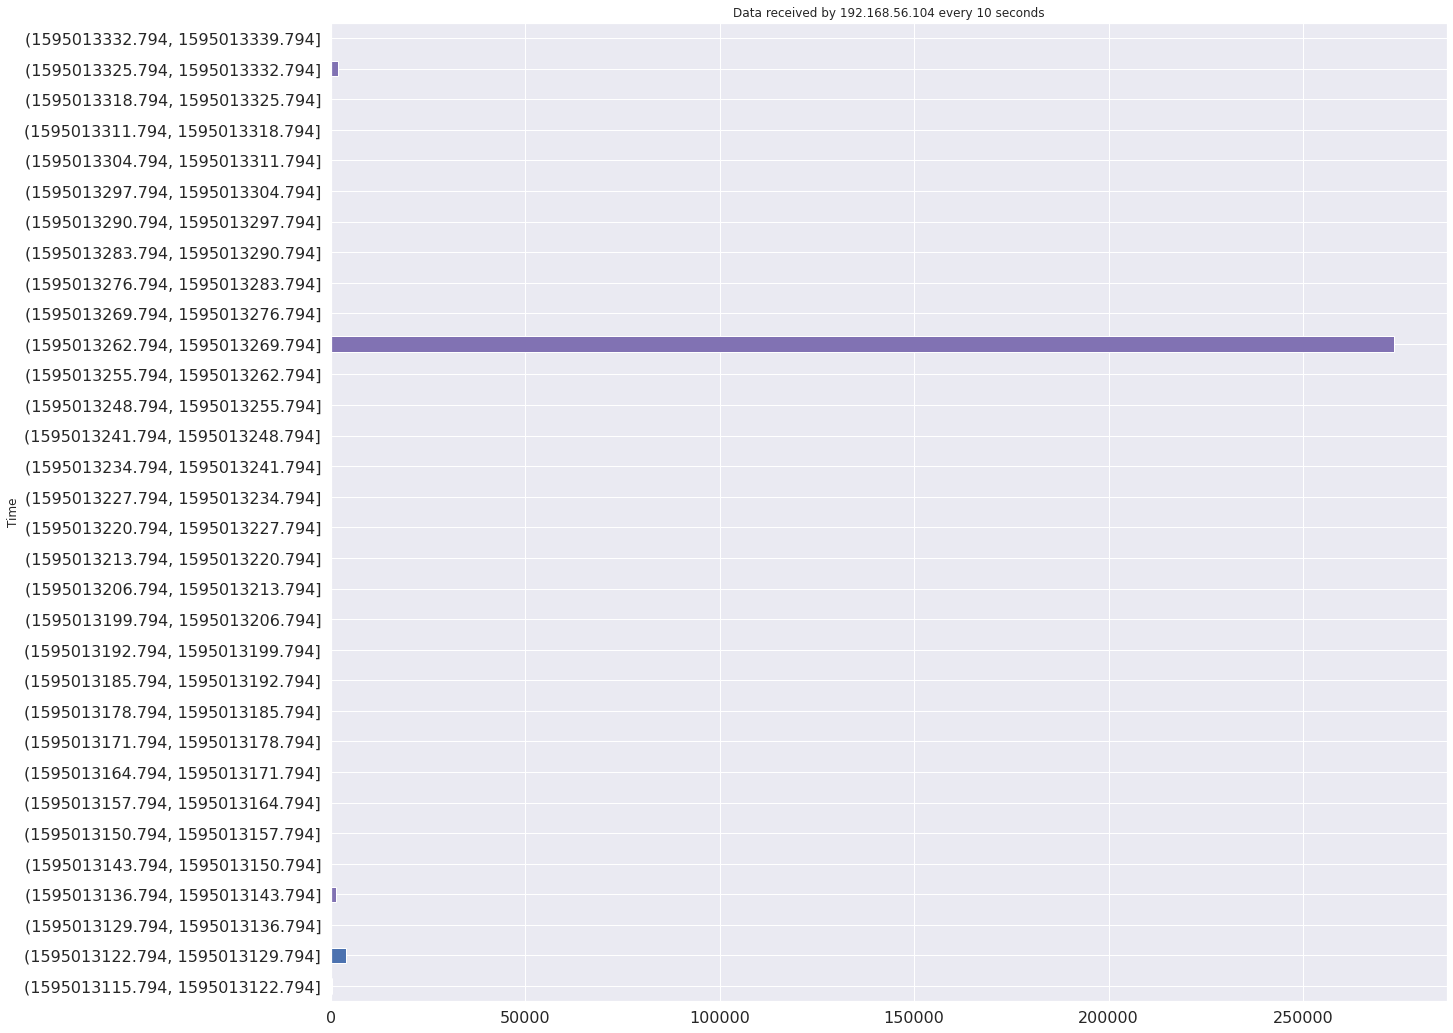

In [14]:
#groupby("time")['payload'].sum().plot(kind='barh',title="Destination Ports (Bytes Received)",figsize=(8,5))

time_slice_df = dos_df[(dos_df['Source'] == "192.168.56.105") & (dos_df['Destination'] == "192.168.56.104")]
time_slice_df = time_slice_df[["Time", "Length"]]
print(time_slice_df)

start_time = float(1595013115.794)
end_time = float(1595013345.744)

bins = np.arange(start_time, end_time+1, 7)
time_slice_df = time_slice_df.groupby(pd.cut(time_slice_df['Time'], bins=bins)).Length.sum()
print("Data received by 192.168.56.104 every 10 seconds:\n"+str(time_slice_df))
time_slice_df.plot.barh(title="Data received by 192.168.56.104 every 10 seconds",
                        figsize=(20,18), color=["m", "b", "y"], fontsize=16)